# Hackathon Santander Data Challenge 

### 1. Introdução

Pequenas e médias empresas brasileiras sabem que inovar é imprescindível para seu funcionamento e permanência no mercado. Isso é o que mostra o resultado da pesquisa do Comitê Inovação nas Pequenas e Médias Empresas (PME) da Associação Nacional de Pesquisa, Desenvolvimento e Engenharia das Empresas Inovadoras (Anpei).

Com o início da pandemia, as preferências sobre o consumo de determinados serviços e produtos mudou. O número de proprietários de pequenas e médias empresas fechando as portas é grande e ainda vai aumentar. Uma inovação bem-sucedida pode representar melhor posicionamento no mercado (ou em alguns casos, a liderança) e até mesmo a sobrevivência de uma empresa.

<img src="https://blog.formaciongerencial.com/wp-content/uploads/2015/07/habilidades-valoradas-empleadores-linkedin.jpg" width="600" height="400">


### 2. Sobre a nossa solução

A nossa solução visa ajudar as pequenas e médias empresas a criar novas experiências de consumo e estimular o comércio com base nas tendências de busca dos usuários. Entre as empresas mais afetadas pela pandemia estão aquelas que não conseguem implementar o uso da tecnologia em seus produtos. O e-commerce é uma solução para a transformação digital e aumentar a venda de seus produtos, porém, ainda há dificuldades em implementa-lo, principalmente quando relacionado ao custo. Então, como podemos ajudar as pequenas e médias empresas a compreenderem seus produtos sem ela ter os dados de consumo de seus clientes?

Nossa solução foca em extrair dados de plataformas do Google (como Google Trends e Google Shopping) para ajudar essas empresas a criarem novas modalidades de consumo, aprimorarem seus produtos e selecionar a melhor opção para seus clientes. Essa análise leva em conta os produtos mais buscado pelas pessoas, informando ao empreendedor se pode ou não ser viável o aumento de estoque de sua loja, seja física ou virtual. O objetivo é usar a inteligência de dados para trazer uma experiência para aqueles que ainda não podem usufrir delas. 

Aqui, vamos demonstrar como é importante analisar os dados de seus produtos e fazer a melhor escolha na hora de renovar o seu estoque. 

<img src="https://googlediscovery.com/wp-content/uploads/google-shopping.jpg">

### 3. Bibliotecas utilizadas para implementação da solução

Segue abaixo uma lista dos recursos que utilizamos para elaborar esta solução:
- pandas: https://pandas.pydata.org/
- pytrends: https://matplotlib.org/
- matplotlib: https://matplotlib.org/
- statsmodels: https://www.statsmodels.org/stable/index.html
- numpy: https://numpy.org/

In [28]:
import pandas as pd                        
from pytrends.request import TrendReq
from pylab import rcParams
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
sns.set(style="darkgrid")

pytrend = TrendReq()

### 4. Preparação e coleta de dados (Google Trends)

Nessa parte iremos demonstrar como nós coletamos os dados e preparamos eles para treinar com um modelo de aprendizado de máquina para identificar tendências. Primeiro, a função *get_google_trends_data* é responsável por coletar todos os dados de pesquisa dos produtos que quer comparar.  Nela, você pode escolher uma data inicial e uma data final para analisar e uma lista de palavras-chave.

A lista de produtos foi escolhida com base na seguinte análise:

<img src="ecommerce.jpeg">
Vamos fazer uma busca de exemplo para ajudar:

- lista de produtos: **alcool em gel, desinfetante, agua sanitaria**
- País: **Brazil**
- Estado: **Todos**
- Data inicial: **01/jan/2014**
- Data final: **01/ago/2020**

In [29]:
def get_google_trends_data(list_product, time_start, time_end, state=None, country='BR'):
    if state:
        sigla='{}-{}'.format(country, state)
    else:
        sigla='{}'.format(country)
    
    data_composer = '{} {}'.format(time_start, time_end)
    pytrend.build_payload(kw_list=list_product, 
                                  geo=sigla, 
                                  cat=0,
                                  timeframe=data_composer)
    
    return pytrend.interest_over_time()

list_product=["alcool em gel", "desinfetante", "agua sanitaria"]
dataset = get_google_trends_data(list_product=list_product, 
                            time_start='2014-01-01',
                            time_end='2020-08-01')

### 5. Uma demonstração dos dados coletados

Em cada coluna temos as palavras chave que buscamos e a frequência de busca naquela determinada data

In [30]:
del dataset['isPartial']
dataset.style.background_gradient(cmap='Greens')

,alcool em gel,desinfetante,agua sanitaria
date,,,
2014-01-01 00:00:00,0,2,4
2014-02-01 00:00:00,1,2,4
2014-03-01 00:00:00,0,2,3
2014-04-01 00:00:00,1,2,3
2014-05-01 00:00:00,1,2,3
2014-06-01 00:00:00,1,2,3
2014-07-01 00:00:00,1,3,4
2014-08-01 00:00:00,1,2,4
2014-09-01 00:00:00,1,3,4


In [31]:
describe = dataset.describe()
describe.style.background_gradient(cmap='Greens')

,alcool em gel,desinfetante,agua sanitaria
count,79.000000,79.000000,79.000000
mean,2.936709,4.607595,5.455696
std,11.488391,2.221213,2.448429
min,0.000000,2.000000,3.000000
25%,1.000000,3.000000,4.000000
50%,1.000000,4.000000,5.000000
75%,1.000000,5.000000,6.000000
max,100.000000,14.000000,17.000000


### 6. Verificando se existe algum valor nulo nas tabelas

In [32]:
dataset.isnull().sum()

alcool em gel     0
desinfetante      0
agua sanitaria    0
dtype: int64

In [33]:
def show_point_compare(df):
    plt.figure(figsize=(15, 6))
    for col in df.columns:
        plt.plot(df.index, df[col], '--')

    plt.title("Busca por produtos")
    plt.legend(df.columns)
    plt.xlabel("data")
    plt.ylabel("frequencia")
    plt.grid("b--")
    plt.show() 
    
def show_p(df):  
    x=df.groupby(['alcool em gel']).count()
    x=x.sort_values(by=df.index ,ascending=False)
    x=x.iloc[0:10].reset_index()
    x
# #plot
    plt.figure(figsize=(8,4))
    ax= sns.barplot(x.index, x['alcool em gel'], alpha=0.8)
    plt.title("Items per Category")
    plt.ylabel('# of items', fontsize=12)
    plt.xlabel('Category', fontsize=12)
    plt.show()


### 7. Uma amostra dos dados coletados:

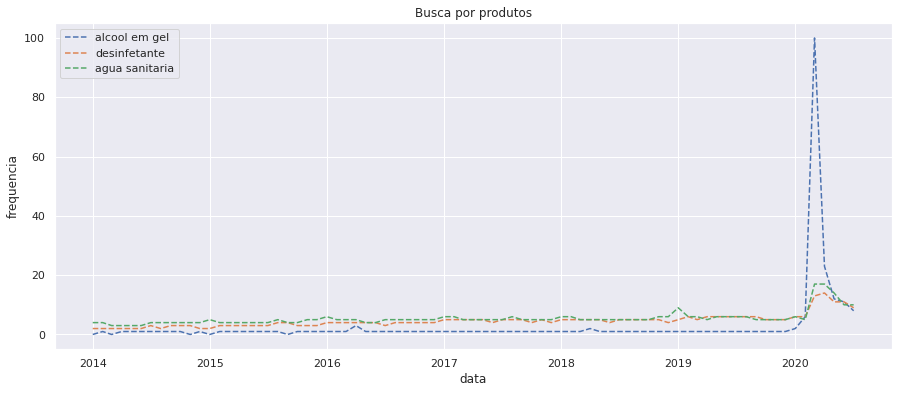

In [34]:
show_point_compare(dataset)

### 8. Uma busca por anos de cada produto: 

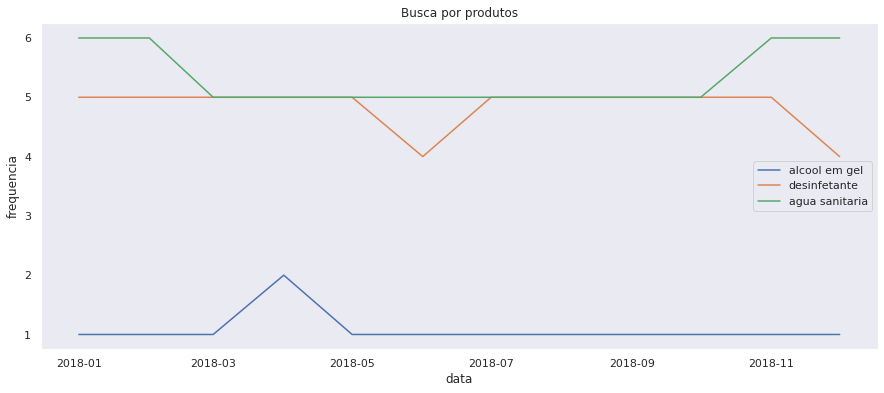

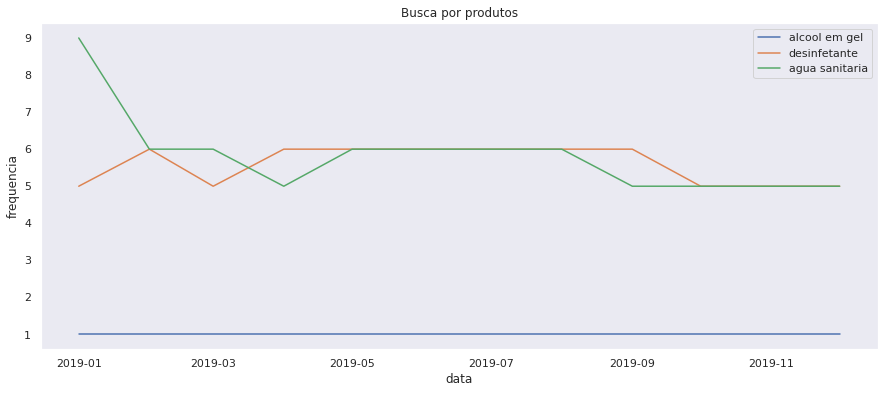

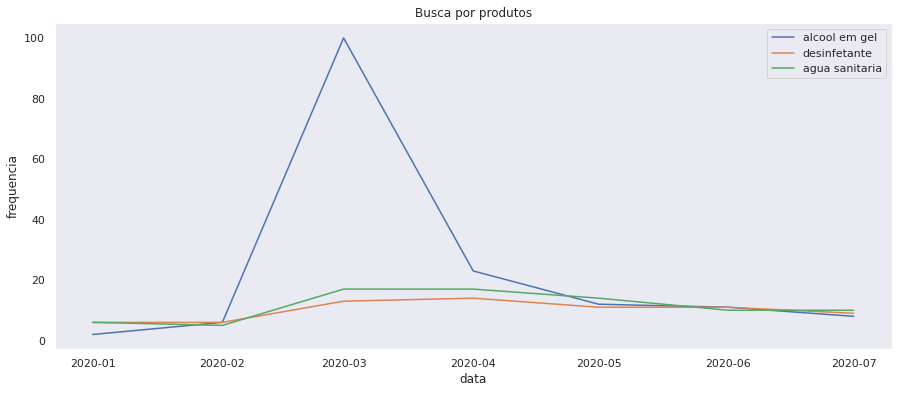

In [35]:
def show_line_compare(df):
    plt.figure(figsize=(15, 6))
    for col in df.columns:
        plt.plot(df.index, df[col])

    plt.title("Busca por produtos")
    plt.legend(df.columns)
    plt.xlabel("data")
    plt.ylabel("frequencia")
    plt.grid()
    plt.show() 
    
def get_media_year(ano):
    y_index = dataset[ano]
    show_line_compare(y_index)
    
get_media_year("2018")
get_media_year("2019")
get_media_year("2020")

### 9. Qual produto teve mais interesse dos usuarios?

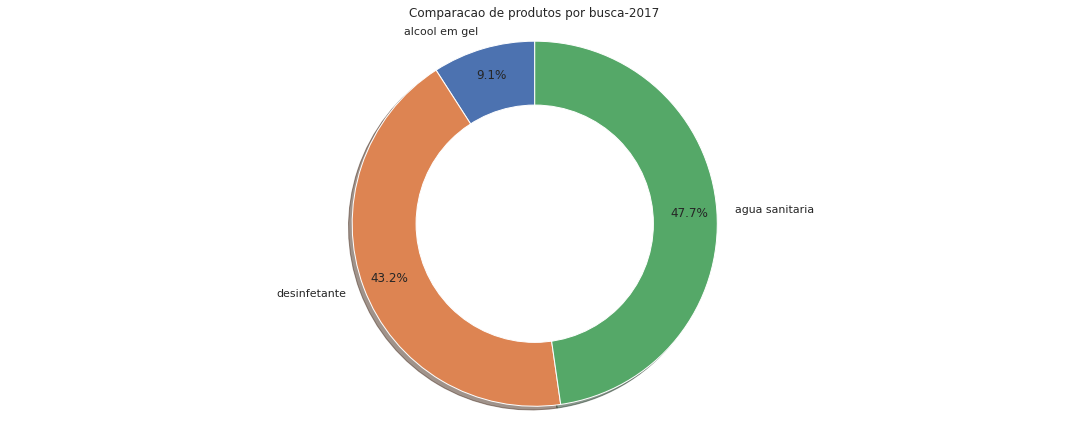

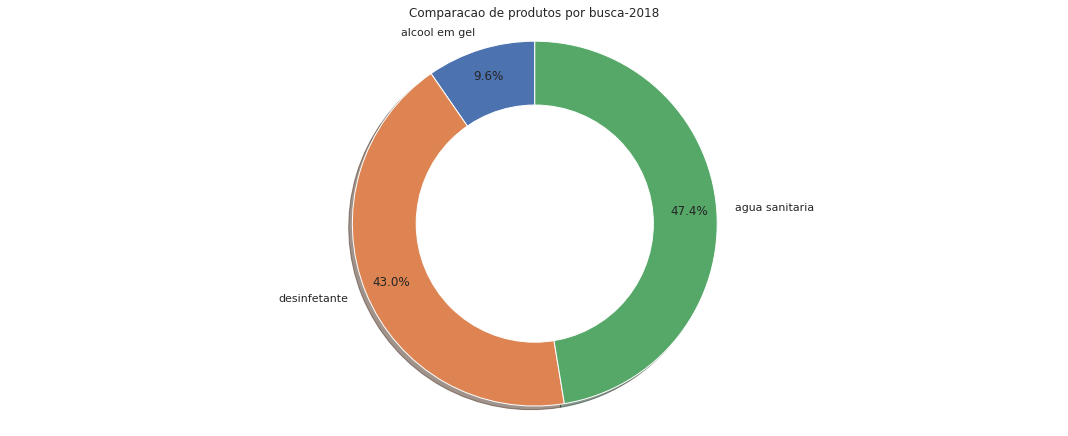

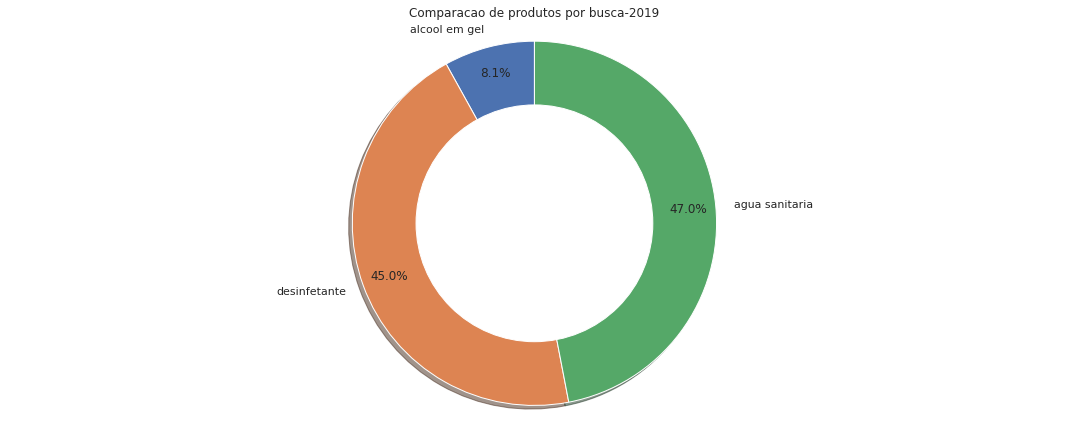

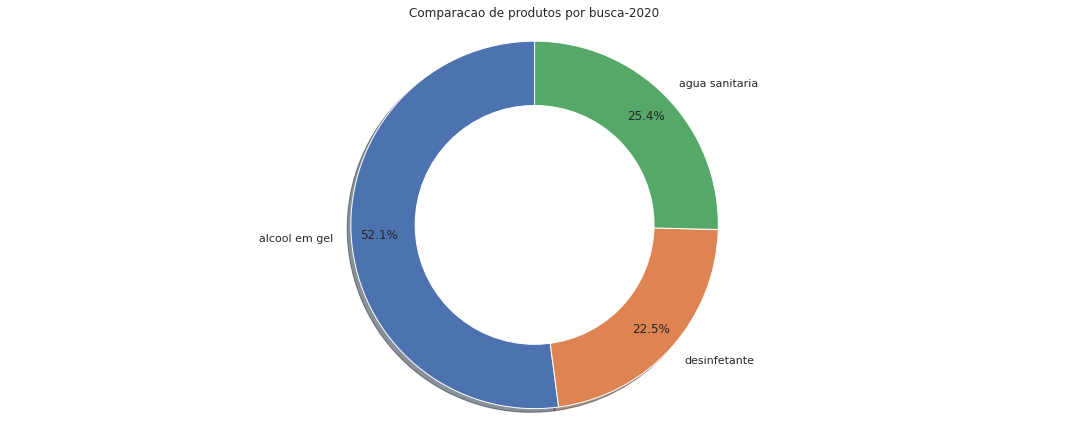

In [36]:
import matplotlib.colors as mcolors
def frequency_total(ano=None):
    plt.figure(figsize=(15, 6))
    explode = list()
    if ano:
        title=f"Comparacao de produtos por busca-{ano}"
        yi = dataset[ano]
        produtos_sum = yi.sum()
        plt.pie(produtos_sum, labels=list_product, 
                 autopct='%1.1f%%', startangle=90, pctdistance=0.85, 
                shadow=True)
        centre_circle = plt.Circle((0,0),0.65,fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        plt.axis('equal') 
        plt.tight_layout()

    else:
        explode = (0, 0.1, 0)
        produtos_sum = dataset.sum()
        title=f"Comparacao de produtos por busca"
        plt.pie(produtos_sum, labels=list_product, 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85)
        centre_circle = plt.Circle((0,0),0.65,fc='white')
        fig = plt.gcf() 
        fig.gca().add_artist(centre_circle)
        plt.axis('equal')
        plt.tight_layout()
    
    plt.axis('equal')  
    plt.title(title)
    plt.show()
    

frequency_total("2017")
frequency_total("2018")
frequency_total("2019")
frequency_total("2020")

### 10. Como construímos um modelo para prever tendências?

#### O que é uma tendência?
Por definição, tendência é aquilo que leva alguém a seguir um determinado caminho ou a agir de certa forma; predisposição, propensão.

#### É possível encontrar tendência nos dados?
Com uma boa análise de dados, é possível extrair tendências interessantes que indiquem um comportamento, um padrão. Isso pode ajudar as pessoas a tomarem decisões. Nessa solução, analisamos tendências de busca para tentar prever um comportamento, ou seja, quando um determinado produto está subindo ou caindo no interesse do público, isso somente olhando as buscas do Google.

#### Por que o Google trends?
Milhares de pessoas fazem buscas no Google, seja para procurar um produto, algum amigo, imagens para um slide. Com o Google Trends não ficamos limitados a dados locais, já que os dados do Google são atualizados periodicamente, o que nos permite elaborar análises automáticas com o passar do tempo, sem qualquer interferência ou seleção de um novo dataset.

#### Por que o Google Shopping?
Também utilizamos dados do Google shopping para extrair dados de um determinado produto. Isso irá ajudar a pequena e média empresa a entender mais sobre o seu produto. Com isso, retornamos para o usuário o preço médio do produto que ele deseja e a avaliação dos usuários. Dessa maneira ele pode se basear nesses dados para elaborar como ele irá vender o seu produto comparando com outros que estão vendendo o mesmo produto.


#### Qual modelo utilizamos para prever as 'tendências'?
Para prever futuras quedas ou aumento de buscas de um produto, utilizamos o modelo SARIMAX. SARIMAX é um modelo estatístico muito utilizado em séries temporais, que é o nosso caso. SARIMAX já foi utilizado para vários fins, bem comum no mercado financeiro para previsão de inflação.

Caso queira saber mais sobre o SARIMAX, separamos um artigo científico bem interessante sobre:
https://www.researchgate.net/publication/313251716_Modelling_the_demand_for_cement_The_case_of_Poland_and_Spain

### 11 Treinando o modelo 

Usando o seasonal decompose para mostrar os gráficos em 4 categorias (Observado, Tendência, Sazonal, Residual) com base nos produtos selecionados:

parâmetro de frequência:
- freq = 365, para tendências do ano
- freq = 30, para tendências do mes
- freq = 7, para tendências da semana

<ipython-input-37-fda2268215e4>:3: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



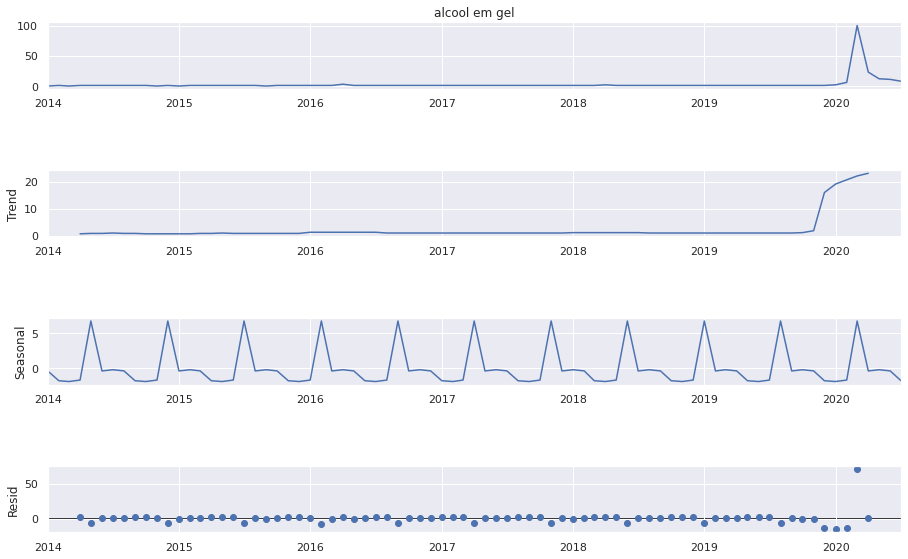

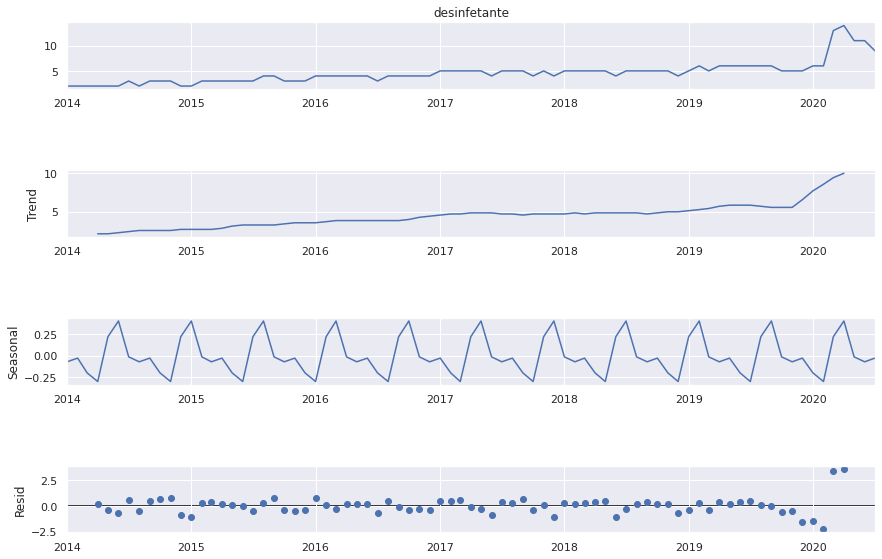

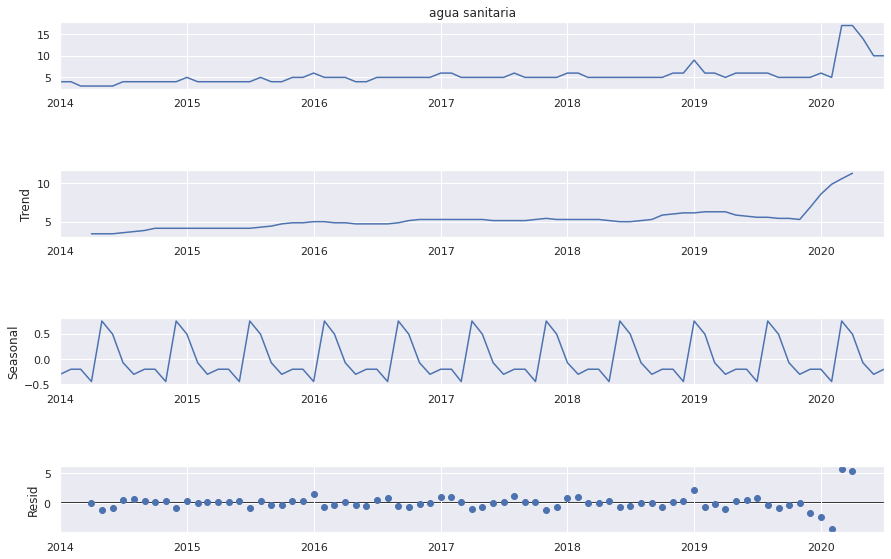

In [37]:
for col in dataset.columns:
    frequencia = 7
    result = sm.tsa.seasonal_decompose(dataset[col].dropna(),
                                    freq=frequencia)
    fig = result.plot()
    fig.set_figheight(9)
    fig.set_figwidth(14)
    plt.show()

Training SARIMAX model ... product: alcool em gel
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1832      0.955      0.192      0.848      -1.689       2.056
ma.L1         -0.9166      0.760     -1.206      0.228      -2.407       0.573
ar.S.L12   -6.706e-05     21.112  -3.18e-06      1.000     -41.380      41.380
sigma2       180.8325     10.204     17.722      0.000     160.834     200.831
Training SARIMAX model ... product: desinfetante
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5893      0.283      2.083      0.037       0.035       1.144
ma.L1         -0.8665      0.216     -4.005      0.000      -1.290      -0.442
ar.S.L12      -0.3876      0.492     -0.788      0.431      -1.352       0.577
sigma2         1.5609      0.171

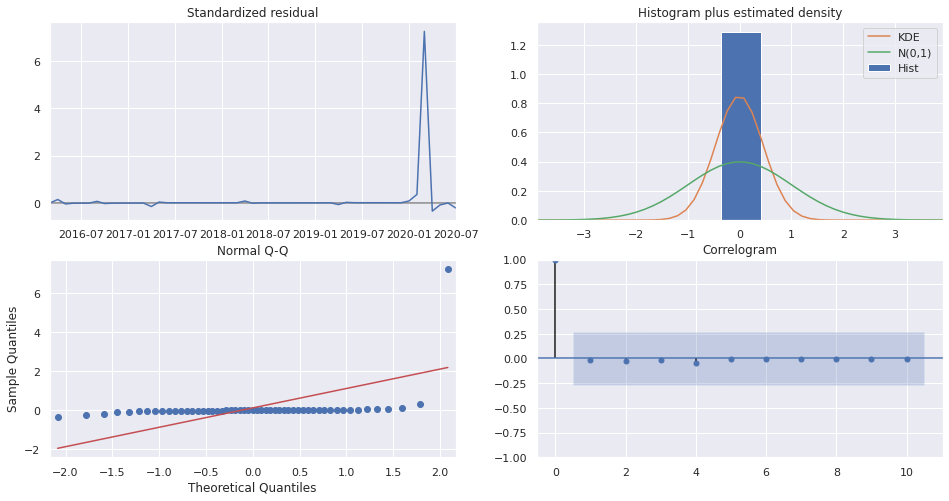

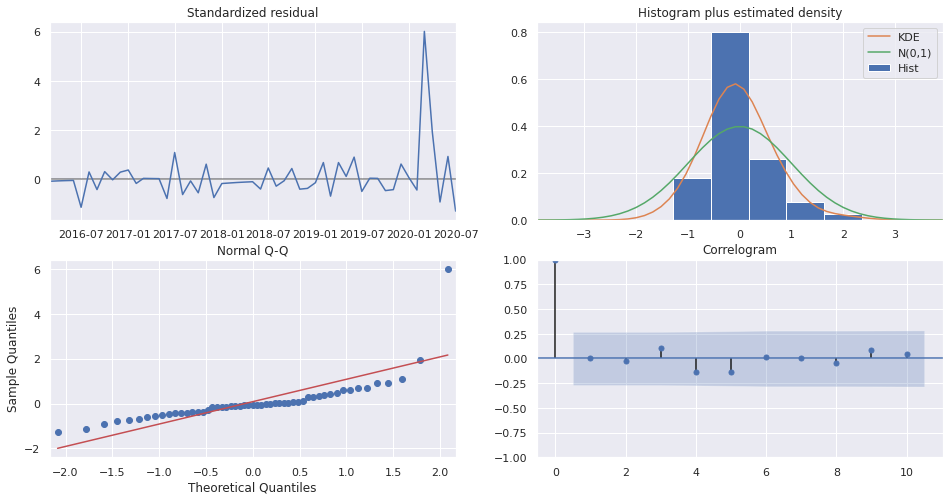

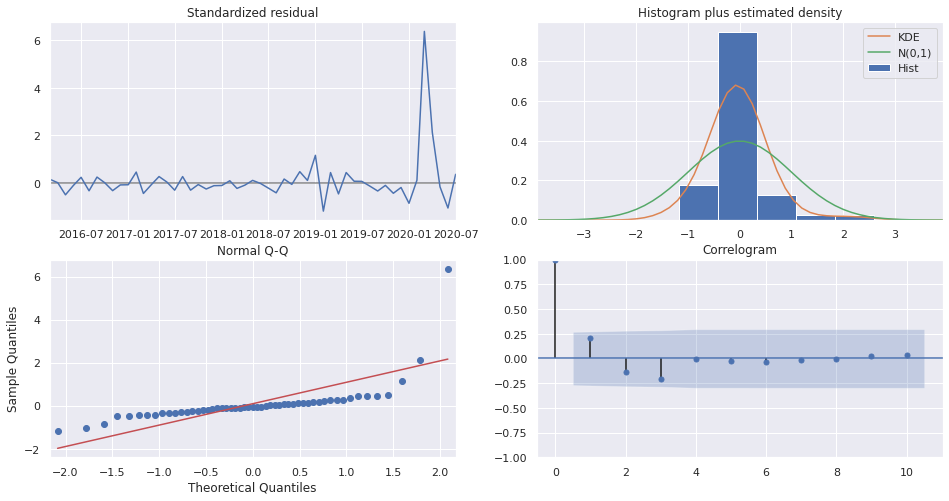

In [38]:
y = dataset.resample('MS').mean()
parametros = {
                "order": (1, 1, 1),
                "seas_order": (1, 1, 0, 12)
             }

predict_model = []
for col in y.columns:
    print(f"Training SARIMAX model ... product: {col}")
    modelo = sm.tsa.statespace.SARIMAX(y[col],
                                order=parametros["order"],
                                seasonal_order=parametros["seas_order"],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = modelo.fit()
    print(results.summary().tables[1])
    results.plot_diagnostics(figsize=(16, 8))
    predict_model.append(results)

### 12. Testando o Modelo de previsão

Para testar o nosso modelo, selecionamos uma faixa de tempo para exibir a predição. A predição do modelo está indicada em vermelho em comparação com o comportamento real (em verde)

            lower alcool em gel  upper alcool em gel
date                                                
2020-01-01           -25.378685            27.334286
2020-02-01           -25.110163            27.602785
2020-03-01           -23.980630            28.732299
2020-04-01             1.387626            54.100539
2020-05-01           -13.115565            39.597334
2020-06-01           -15.234413            37.478474
2020-07-01           -15.427802            37.285075


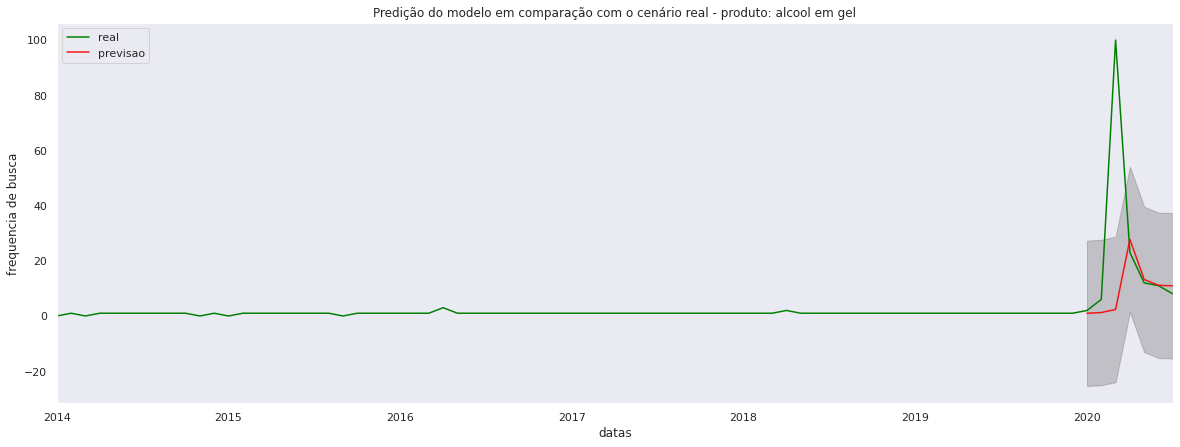

            lower desinfetante  upper desinfetante
date                                              
2020-01-01            3.464446            8.361829
2020-02-01            4.088479            8.985862
2020-03-01            3.043395            7.940778
2020-04-01            9.144532           14.041915
2020-05-01            9.694293           14.591676
2020-06-01            7.386126           12.283509
2020-07-01            8.157673           13.055056


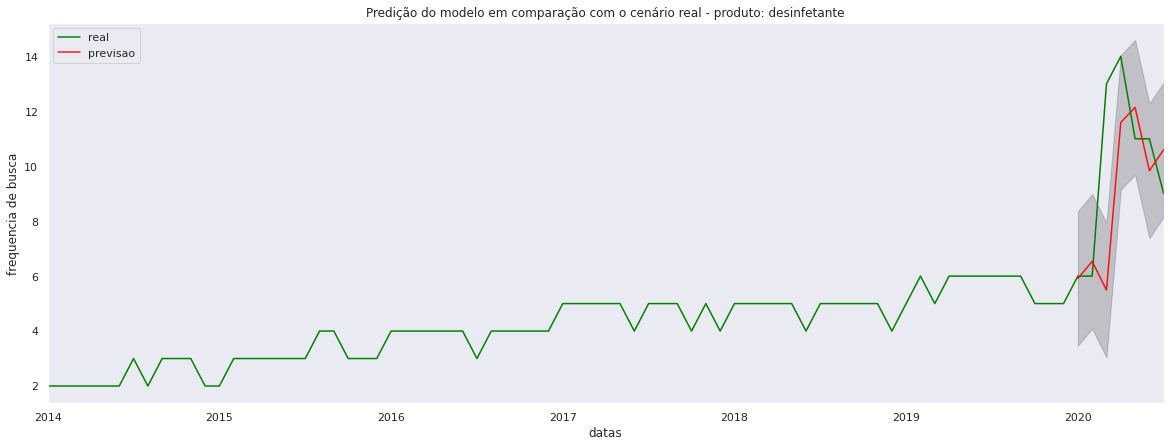

            lower agua sanitaria  upper agua sanitaria
date                                                  
2020-01-01              3.914382             11.293598
2020-02-01              1.091330              8.470480
2020-03-01              1.319435              8.698528
2020-04-01              9.308328             16.687371
2020-05-01             10.612291             17.991290
2020-06-01              8.287540             15.666501
2020-07-01              5.622248             13.001176


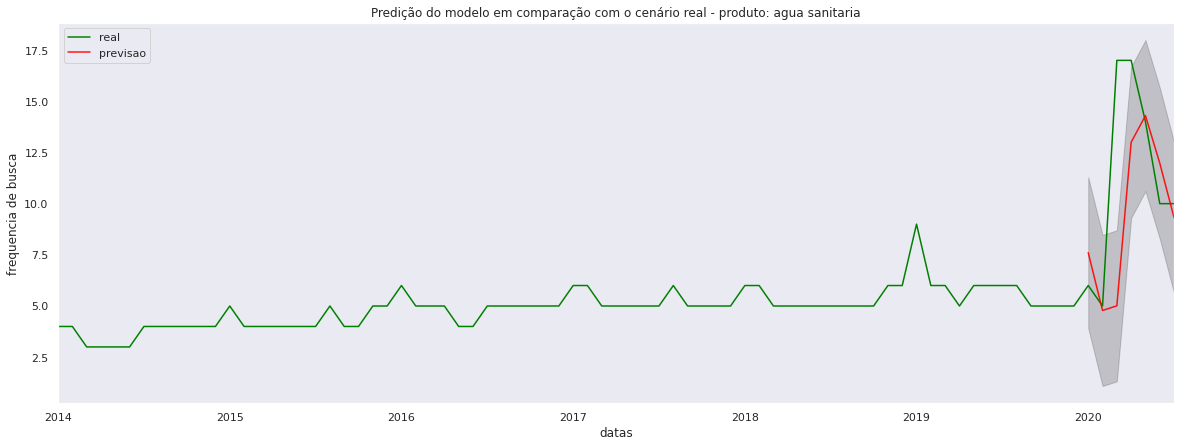

In [39]:


for model_i, col in zip(predict_model, list_product):
    predicao_m = model_i.get_prediction(start=pd.to_datetime('2020-01-01'), 
                                        dynamic=False)
    predicao_i = predicao_m.conf_int()
    
    test_model = y['2014':][col].plot(label='real', color='green')
    
    predicao_m.predicted_mean.plot(ax=test_model, color='red', 
                                   label='previsao', alpha=.9, 
                                   figsize=(20, 7))
    
    test_model.fill_between(predicao_i.index,
                            predicao_i.iloc[:, 0],
                            predicao_i.iloc[:, 1], color='k', alpha=.2)
    
    print(predicao_i)
    #plt.candlestick2_ochl(df['upper alcool em gel'], df['upper alcool em gel'], width=.75, colorup='g', colordown='r', alpha=0.75)
    test_model.set_xlabel('datas')
    test_model.set_ylabel('frequencia de busca')
    plt.grid()
    plt.legend()
    plt.title(f"Predição do modelo em comparação com o cenário real - produto: {col}")
    plt.show()

## Google Shopping

### 1. Como os dados do Google Shopping podem ajuda-lo a entender um produto?

Para complementar nossa solução, implementamos uma ferramenta para buscar um determinado produto e extrair preços médios e avaliações dos usuários usando o Google Shopping. Com isso, essa parte ajuda o empreendedor a entender detalhes de produtos, tais como o preço médio, avaliações positivas do usuário, maior preço encontrado e maior preço encontrado.


In [40]:
import requests
from bs4 import BeautifulSoup
import re
import locale
import numpy as np
from decimal import Decimal
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np


def get_busca(product_name, preco_inicial=None, preco_final=None):
    if preco_inicial and preco_final:
        url = 'https://www.google.com/search?q={}&source=lnms&tbm=shop&tbs=vw:l,mr:1,price:{},ppr_max:{}'.format(
            product_name.replace(' ', '+'), preco_inicial, preco_final)
    else:
        url = 'https://www.google.com/search?q={}&source=lnms&tbm=shop'.format(product_name.replace(' ', '+'))
    return url


def get_data_google_shopping(product_name, preco_inicial=None, preco_final=None):
    url = get_busca(product_name, preco_inicial, preco_final)
    headers = requests.utils.default_headers()
    headers.update({
            'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
                })
    
    response = requests.get(url, headers=headers, timeout=300)
    soup = BeautifulSoup(response.content, "html.parser")
    soup_precos = soup.findAll("span", {"class": "Nr22bf"})
    soup_avaliacao = soup.findAll("span", {"class": "Rv6wm"})
    
    return filter_prices(soup_precos), filter_avaliation(soup_avaliacao)

def show_plot(prices):
    x = np.arange(len(prices))
    fig, ax = plt.subplots()
    plt.bar(x, prices)
    plt.xlabel('')
    plt.title("Variação de preços do produto")
    plt.show()
                  
def media_geo(prices):
    a = np.array(prices)
    return "%.2f" % a.prod()**(1.0/len(a))

def max_value(prices):
    return np.max(np.array(prices))

def min_value(prices):
    return np.min(np.array(prices))

def filter_prices(soup_precos):
    prices_list = []
    regex = r"[>]R[$].(.*)[<]\/span"
    for p in soup_precos:
        price = re.search(regex, str(p))
        if price:
            price_product = price.groups()[0]
            price_format = price_product.replace('.', '')
            if re.search("^\d+(,\d{1,2})?$", price_format):
                prices_list.append(float(price_format.replace(',', '.')))
                
                
    return prices_list
                
    
            
def filter_avaliation(soup_avaliacao):        
    regex_aval = r"[>](.*)[<]\/span[>]"
    count_aval = 0
    count_positive = 0
    for p in soup_avaliacao:
        positive = re.search(regex_aval, str(p))
        if positive:
            positive_product = positive.groups()[0]
            count_positive += int(positive_product.replace('%', ''))
            count_aval = count_aval + 1

    if count_aval != 0:
        media_positiva = count_positive/count_aval
        return media_positiva   
    else:
        print('Nenhuma avaliação encontrada!\n')

In [41]:
preco_inicial = 20
preco_final = 40

product_name = 'Alcool em Gel'

lista = get_data_google_shopping(product_name, preco_inicial, preco_final)

avaliacao_produto = [100-lista[1], lista[1]]

In [42]:
prices_df = pd.DataFrame(lista[0], columns=['precos'])
prices_df.style.background_gradient(cmap='Greens')

,precos
0,29.990000
1,22.300000
2,32.880000
3,9.500000
4,15.000000
5,39.900000
6,39.900000
7,19.990000
8,10.990000
9,15.490000


### 2. Estatistica do produto com base em avaliação dos usuários

In [43]:
def avaliation_pie(lista):
    title=f"Avaliação do produto: {product_name}"
    explode = (0, 0.1, 0, 0)
    plt.figure(figsize=(15, 6))
    plt.pie([[100-lista[1], lista[1]]], labels=['negativas', 'positivas'], 
            colors=['red', 'green'], autopct='%1.1f%%', shadow=False, startangle=90)
    plt.title(title)


****************************************************************************************************
Produto: Alcool em Gel
Preço mínimo: 8.23
Preço máximo: 39.9
Preço médio: 16.78
****************************************************************************************************


<ipython-input-43-a0a21fb1443c>:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



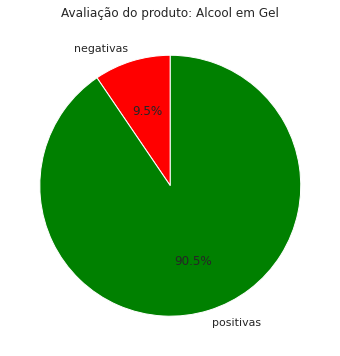

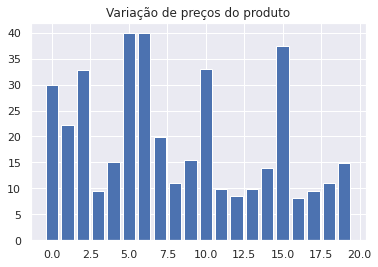

In [44]:
if len(lista) > 0:
    print("*" * 100)
    print(f"Produto: {product_name}")
    print(f"Preço mínimo: {min_value(lista[0])}")
    print(f"Preço máximo: {max_value(lista[0])}")
    print(f"Preço médio: {media_geo(lista[0])}")
    print("*" * 100)
    avaliation_pie(lista)

    show_plot(lista[0])